In [31]:
import os
import numpy as np
from nilearn import plotting
from nilearn import image
import nibabel as nib


In [32]:
hcp_map_path = '/scratch/hyruuk/neuromod/shinobi2024/hcp_results/sub-01/res_stats_ses-002_run-01/effect_size_maps/face-shape.nii.gz'
shinobi_map_path = '/scratch/hyruuk/neuromod/shinobi2024/processed/beta_maps/ses-level/HIT/sub-02_ses-014_simplemodel_HIT.nii.gz'
raw_data_path = '/scratch/hyruuk/neuromod/shinobi2024/shinobi.fmriprep/sub-01/ses-002/func/sub-01_ses-002_task-shinobi_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
subject_mask = '/scratch/hyruuk/neuromod/shinobi2024/cneuromod.processed/smriprep/sub-01/anat/sub-01_space-MNI152NLin6Asym_desc-brain_mask.nii.gz'

In [34]:
mask_resampled = image.resample_img(subject_mask, target_affine=nib.load(shinobi_map_path).affine, target_shape=image.load_img(shinobi_map_path).shape)

/home/hyruuk/python_envs/shinobi_env/lib/python3.7/site-packages/nilearn/image/resampling.py:295: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  "Resampling binary images with continuous or "


In [35]:
print(nib.load(hcp_map_path).affine)
print(nib.load(shinobi_map_path).affine)
print(nib.load(raw_data_path).affine)
print(nib.load(subject_mask).affine)
print(mask_resampled.affine)

[[   2.     0.     0.   -96.5]
 [   0.     2.     0.  -132.5]
 [   0.     0.     2.   -78.5]
 [   0.     0.     0.     1. ]]
[[   4.     0.     0.   -96.5]
 [   0.     4.     0.  -132.5]
 [   0.     0.     4.   -78.5]
 [   0.     0.     0.     1. ]]
[[   2.     0.     0.   -96.5]
 [   0.     2.     0.  -132.5]
 [   0.     0.     2.   -78.5]
 [   0.     0.     0.     1. ]]
[[   0.80000001    0.            0.          -91.        ]
 [   0.            0.80000001    0.         -126.        ]
 [   0.            0.            0.80000001  -72.        ]
 [   0.            0.            0.            1.        ]]
[[   4.     0.     0.   -96.5]
 [   0.     4.     0.  -132.5]
 [   0.     0.     4.   -78.5]
 [   0.     0.     0.     1. ]]


In [36]:
print(nib.load(hcp_map_path).shape)
print(nib.load(shinobi_map_path).shape)
print(nib.load(raw_data_path).shape)
print(nib.load(subject_mask).shape)
print(mask_resampled.shape)

(97, 115, 97)
(97, 115, 97)
(97, 115, 97, 420)
(228, 273, 228)
(97, 115, 97)


In [17]:
resampled_hcp.shape

(97, 115, 97)

In [25]:
from nilearn import masking

masked_hcp = masking.apply_mask([resampled_hcp], resampled_mask)
masked_shinobi = masking.apply_mask([shinobi_map_path], resampled_mask)

In [29]:
print((masked_hcp != 0).shape)

(1, 28067)


/home/hyruuk/python_envs/shinobi_env/lib/python3.7/site-packages/nilearn/image/resampling.py:295: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  "Resampling binary images with continuous or "


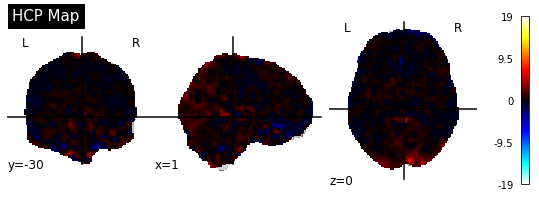

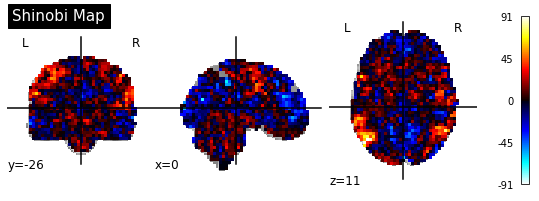

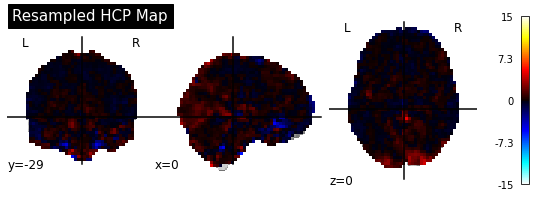

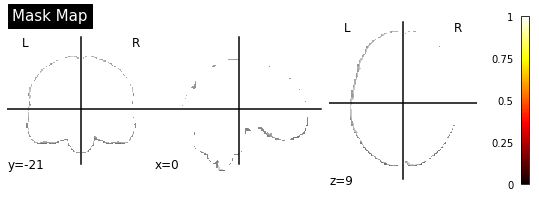

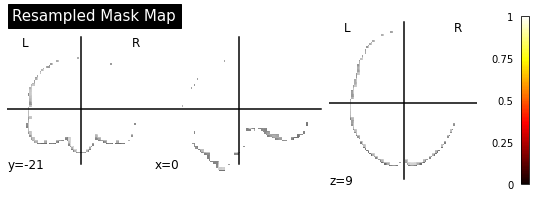

In [18]:
from nilearn import plotting

# Plot HCP map
plotting.plot_stat_map(hcp_map_path, title="HCP Map")

# Plot Shinobi map
plotting.plot_stat_map(shinobi_map_path, title="Shinobi Map")

# Plot resampled HCP map
resampled_hcp = image.resample_img(hcp_map_path, target_affine=nib.load(shinobi_map_path).affine, target_shape=nib.load(shinobi_map_path).shape)
plotting.plot_stat_map(resampled_hcp, title="Resampled HCP Map")


# Plot original mask map
plotting.plot_stat_map(subject_mask, title="Mask Map")

# Plot original mask map
resampled_mask = image.resample_img(subject_mask, target_affine=nib.load(shinobi_map_path).affine, target_shape=nib.load(shinobi_map_path).shape)
plotting.plot_stat_map(resampled_mask, title="Resampled Mask Map")


plotting.show()


hcp_map_path = '/scratch/hyruuk/neuromod/shinobi2024/hcp_results/sub-01/res_stats_ses-002_run-01/effect_size_maps/face-shape.nii.gz'
shinobi_map_path = '/scratch/hyruuk/neuromod/shinobi2024/processed/beta_maps/ses-level/HIT/sub-02_ses-014_simplemodel_HIT.nii.gz'
raw_data_path = '/scratch/hyruuk/neuromod/shinobi2024/shinobi.fmriprep/sub-01/ses-002/func/sub-01_ses-002_task-shinobi_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
subject_mask = '/scratch/hyruuk/neuromod/shinobi2024/cneuromod.processed/smriprep/sub-01/anat/sub-01_space-MNI152NLin6Asym_desc-brain_mask.nii.gz'

In [15]:
resampled_hcp.get_fdata().shape

(97, 115, 97)

In [16]:
# Get the voxel data as NumPy arrays
hcp_data = hcp_niimap.get_fdata()
shinobi_data = shinobi_niimap.get_fdata()

# Optionally, mask both maps to focus only on relevant (non-zero) voxels
# This is useful to avoid including background or non-brain regions
hcp_mask = hcp_data != 0
shinobi_mask = shinobi_data != 0
combined_mask = np.logical_and(hcp_mask, shinobi_mask)

In [46]:
sum(sum(sum(hcp_mask)))

264843

In [50]:
resampled_data = resampled_hcp.get_fdata()
resampled_mask = resampled_data != 0



139258

In [53]:
sum(sum(sum(shinobi_mask)))

29321

In [8]:
from shinobi_behav import DATA_PATH, FIG_PATH
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn import image
import os
import numpy as np
import seaborn as sbn
from nilearn.input_data import NiftiMasker
import psutil
import pickle
import tqdm
import os.path as op
from itertools import product
import numpy as np
import tqdm
import pickle
from joblib import Parallel, delayed

## Set constants
path_to_data = DATA_PATH
figures_path = FIG_PATH
contrasts = ['Kill', 'HealthLoss', 'HIT', 'JUMP']# + [f"{x}X{y}" for x,y in product(["HIT", "Kill", "HealthLoss"],["lvl1", "lvl4", "lvl5"])]
subjects = ['sub-01', 'sub-02', 'sub-04', 'sub-06']
results_path = '/home/hyruuk/scratch/neuromod/shinobi2023/processed/ses-level_beta_maps_ICC.pkl'
model = "simple"

# load data
maps = []
raw_data = []
subj_arr = []
sess_arr = []
run_arr = []
cond_arr = []
fnames = []
mapnames = []

# Load shinobi data
for contrast in contrasts:
    try:
        files = os.listdir(path_to_data + 'processed/beta_maps/ses-level/{}/'.format(contrast))
        for file in files:
            if model in file:
                fpath = path_to_data + 'processed/beta_maps/ses-level/{}/'.format(contrast) + file
                file_split = file.split('_')
                sub = file_split[0]
                ses = file_split[1]
                run = file[20]
                print(f'Loading {fpath}')
                raw_dpath = op.join(
                    path_to_data,
                    "shinobi.fmriprep",
                    sub,
                    ses,
                    "func",
                    f"{sub}_{ses}_task-shinobi_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz",
                )
                subj_arr.append(sub)
                sess_arr.append(ses)
                #run_arr.append(run)
                cond_arr.append(contrast)
                #raw_data.append(image.concat_imgs(raw_dpath))
                fnames.append(raw_dpath)
                mapnames.append(fpath)
    except Exception as e:
        print(e)
        print('no file for contrast {}'.format(contrast))
        continue
    
# Load HCP data (treat HCP run as "sessions")
for sub in subjects:
    subfolder = op.join(path_to_data, "hcp_results", sub)
    runfolders = [f for f in os.listdir(subfolder) if 'run-' in f]
    for runfolder in runfolders:
        conditions = [f.split('.')[0] for f in os.listdir(op.join(subfolder, runfolder, 'effect_size_maps')) if '.nii.gz' in f]
        for cond in conditions:
            fpath = op.join(subfolder, runfolder, 'effect_size_maps', '{}.nii.gz'.format(cond))
            print(f'Loading {fpath}')
            subj_arr.append(sub)
            sess_arr.append('_'.join(runfolder.split('_')[2:]))
            #run_arr.append(run)
            cond_arr.append(cond)
            #raw_data.append(image.concat_imgs(raw_dpath))
            fnames.append(raw_dpath)
            mapnames.append(fpath)


/home/hyruuk/python_envs/shinobi_env/lib/python3.7/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Loading /scratch/hyruuk/neuromod/shinobi2024/processed/beta_maps/ses-level/Kill/sub-04_ses-003_simplemodel_Kill.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/processed/beta_maps/ses-level/Kill/sub-01_ses-010_simplemodel_Kill.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/processed/beta_maps/ses-level/Kill/sub-02_ses-008_simplemodel_Kill.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/processed/beta_maps/ses-level/Kill/sub-01_ses-004_simplemodel_Kill.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/processed/beta_maps/ses-level/Kill/sub-04_ses-007_simplemodel_Kill.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/processed/beta_maps/ses-level/Kill/sub-06_ses-007_simplemodel_Kill.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/processed/beta_maps/ses-level/Kill/sub-02_ses-010_simplemodel_Kill.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/processed/beta_maps/ses-level/Kill/sub-01_ses-008_simplemodel_Kill.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/pro

Loading /scratch/hyruuk/neuromod/shinobi2024/hcp_results/sub-04/res_stats_ses-011_run-02/effect_size_maps/tongue-avg.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/hcp_results/sub-04/res_stats_ses-011_run-02/effect_size_maps/reward-punishment.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/hcp_results/sub-04/res_stats_ses-011_run-02/effect_size_maps/shape-face.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/hcp_results/sub-04/res_stats_ses-011_run-02/effect_size_maps/story.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/hcp_results/sub-04/res_stats_ses-011_run-02/effect_size_maps/effects_interest.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/hcp_results/sub-04/res_stats_ses-011_run-02/effect_size_maps/shape.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/hcp_results/sub-04/res_stats_ses-011_run-02/effect_size_maps/left_foot.nii.gz
Loading /scratch/hyruuk/neuromod/shinobi2024/hcp_results/sub-04/res_stats_ses-011_run-02/effect_size_maps/story-math.nii.gz
Loadin

In [3]:
len(mapnames)

2008

In [4]:
mapnames[204]

'/scratch/hyruuk/neuromod/shinobi2024/hcp_results/sub-01/res_stats_ses-002_run-01/effect_size_maps/face.nii.gz'